<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

we can't alwayes solve problem by fitting a line and predicting a continous value, sometimes the output should be disctere(Classification problem)

we need to convert it to probilaty problem >> functions like sigmoid will help:
 \begin{equation}
\text{sigmoid}(x) = \frac{1}{1 + e^{-z}}
\end{equation}

so the hyopthesis function would be:
 \begin{equation}
h_{\theta}(x) = \sigma(\theta^T x)
\end{equation}

**cost function:**

beacuase of the non linerity nature in teh segmoid function we can't not use the MSE cost function as befor, as it will result in a non-convex function where reaching an optimal minumma is not gurnteed

 \begin{equation}
J(\theta) =  [-y \log(h_{\theta}(x)) - (1 - y) \log(1 - h_{\theta}(x))]
\end{equation}


Now we need to find the paramaters Θ in a way that **minimaize the loss function** so we apply gradient dcenet algorthim as we did in liner regression





---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

In [3]:
# fisrt define the segmoid and loss functions

def segmoid(z):
  return 1/(1+np.exp(-z))

def get_loss(yhat , y):
  return np.mean((-y*np.log(yhat+1e-6)) - (1-y)*np.log(1-yhat+1e-6) , axis=0)

(2, 200)
(1, 200)


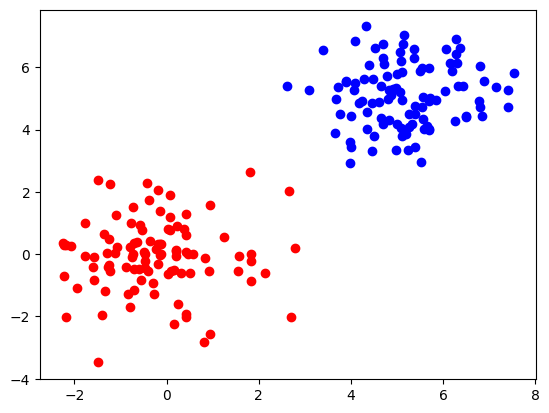

(200, 2)
(200, 1)


In [4]:
# geneate random data Q1
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+5
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)

print(X.shape)
print(y.shape)
X = X.T
y = y.T
plotClass(X.T,y.T,'o')
print(X.shape)
print(y.shape)

# add ones columns as the first column to the data for the bias term

In [5]:
ones_col = np.ones((X.shape[0] , 1))
A = np.concatenate(( ones_col , X), axis=1)
print(A.shape)
print(A)

(200, 3)
[[ 1.00000000e+00  2.61665445e+00  5.40747402e+00]
 [ 1.00000000e+00  5.00421384e+00  5.79045874e+00]
 [ 1.00000000e+00  5.33485158e+00  4.16866534e+00]
 [ 1.00000000e+00  6.25141600e+00  4.27262906e+00]
 [ 1.00000000e+00  4.99823166e+00  4.18662269e+00]
 [ 1.00000000e+00  6.36503359e+00  6.62292503e+00]
 [ 1.00000000e+00  5.58469979e+00  4.03251246e+00]
 [ 1.00000000e+00  5.36718402e+00  6.57413477e+00]
 [ 1.00000000e+00  4.51726271e+00  6.61173986e+00]
 [ 1.00000000e+00  5.11739963e+00  3.79906227e+00]
 [ 1.00000000e+00  6.80553546e+00  6.02719404e+00]
 [ 1.00000000e+00  5.38186588e+00  4.49441492e+00]
 [ 1.00000000e+00  3.77306528e+00  4.51226813e+00]
 [ 1.00000000e+00  6.28722199e+00  6.91940972e+00]
 [ 1.00000000e+00  4.47657783e+00  5.63114818e+00]
 [ 1.00000000e+00  3.99781224e+00  3.43822242e+00]
 [ 1.00000000e+00  5.38132634e+00  6.30934401e+00]
 [ 1.00000000e+00  4.70777161e+00  6.29196234e+00]
 [ 1.00000000e+00  4.35689306e+00  4.01659847e+00]
 [ 1.00000000e+00  5.1

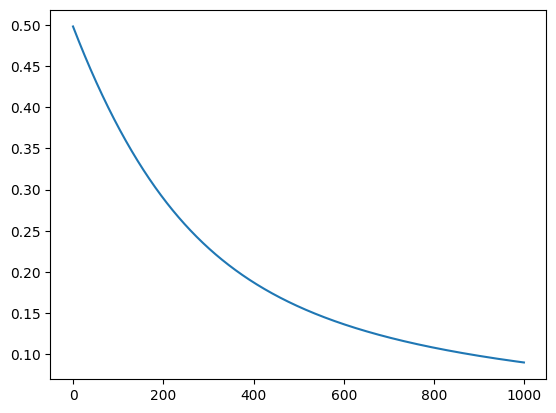

In [6]:
#hyper paramters

num_iter = 1000
lr = 0.0001
w = np.random.randn(A.shape[1] , 1)
ls=[] # losses

for i in range(num_iter):

  # forward pass
  Z = A@w
  yhat = segmoid(Z)
  ls.append(get_loss(yhat ,y))

  # optmaiaztion (backward pass)
  dw = A.T @(yhat - y) # i need to know the derivation
  w = w-lr*dw


plt.figure
plt.plot(ls)


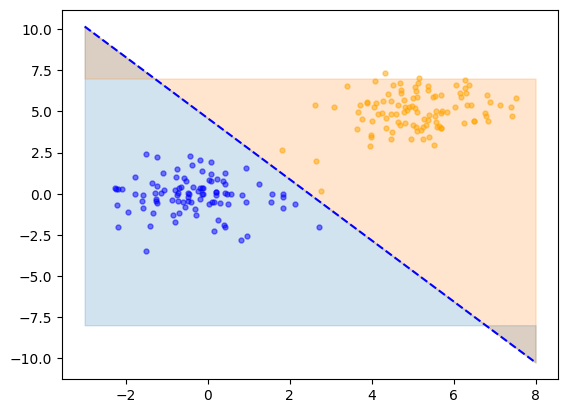

In [7]:
plt.figure()

# how to draw the decion boundary ?
#you need to find two point x1 and x2
#w0 + w1*x1 + w2*x2 =0 >>> solve for x2
#x2 = -( w1*x1 + w0) / w2

x1 = np.linspace(-3,8,3)
x2 = -(w[1]*x1 + w[0]) / w[2]
plt.plot(x1, x2, color='blue', linestyle='--')
plt.fill_between(x1, x2, -8, color='tab:blue', alpha=0.2)
plt.fill_between(x1, x2, 7, color='tab:orange', alpha=0.2)
plt.scatter(*X[yhat[:, 0] < 0.5].T, color='blue', marker='.', s=50, alpha=0.5)
plt.scatter(*X[yhat[:, 0] >= 0.5].T, color='orange', marker='.', s=50, alpha=0.5)



---



# Exersises

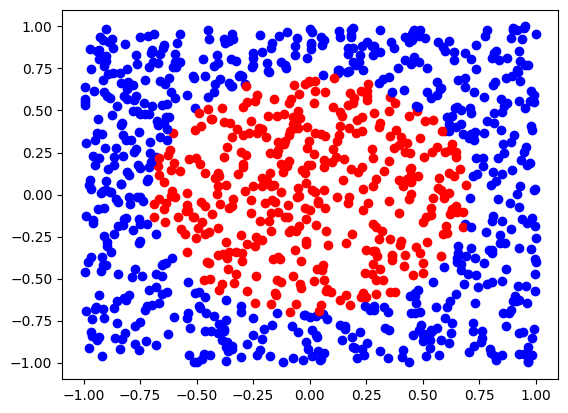

(2, 1000)
(1, 1000)


In [8]:
#Q2
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [9]:

M = 3
A = []
for i in range(M + 1):
  for j in range(M + 1):
    A.append(X[0,:]**i * X[1, :]**j)

A = np.array(A).T
print(A.shape)

(1000, 16)


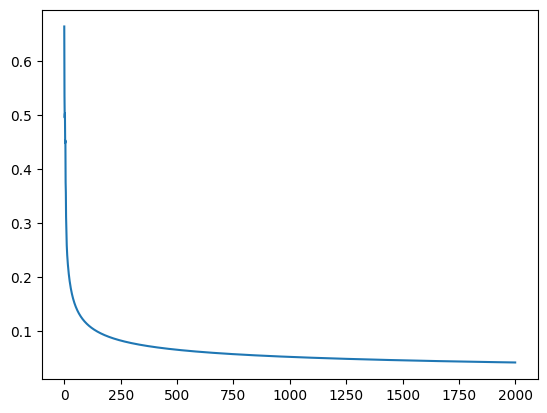

In [10]:
epochs = 2000
lr = 1e-2
ls = []
w = np.random.rand(A.shape[1], 1)
for i in range(epochs):
  #forward pass
  z = A @ w
  yhat = segmoid(z)
  loss = get_loss(yhat, y.reshape(-1,1))
  ls.append(loss)

  #backward
  dw = A.T @ (yhat - y.reshape(-1,1))
  w -= lr * dw

plt.plot(ls)

In [11]:
print(yhat)

[[9.99999993e-01]
 [9.99999954e-01]
 [1.00000000e+00]
 [9.99030405e-01]
 [6.13465533e-01]
 [9.99995352e-01]
 [9.99999432e-01]
 [6.34223051e-07]
 [2.34534926e-01]
 [9.99999962e-01]
 [9.99972954e-01]
 [9.99999995e-01]
 [1.00000000e+00]
 [9.99900718e-01]
 [1.54110219e-02]
 [9.58838645e-01]
 [9.93962805e-01]
 [9.99978863e-01]
 [4.19929032e-01]
 [7.18206878e-07]
 [9.99927455e-01]
 [1.00000000e+00]
 [8.31998883e-03]
 [3.30292668e-04]
 [2.41817147e-05]
 [9.99999424e-01]
 [9.99999926e-01]
 [9.98234157e-01]
 [1.83733579e-02]
 [7.05274931e-05]
 [1.61866023e-06]
 [1.00000000e+00]
 [9.99996785e-01]
 [9.99994034e-01]
 [1.73293318e-06]
 [4.88548901e-02]
 [9.99999972e-01]
 [9.98470171e-01]
 [6.28504906e-04]
 [9.99858443e-01]
 [9.99999986e-01]
 [4.97945965e-01]
 [1.00000000e+00]
 [9.99999998e-01]
 [4.82447872e-06]
 [9.99753368e-01]
 [9.99996174e-01]
 [2.24335726e-03]
 [1.24558810e-07]
 [1.58604643e-01]
 [1.20490825e-06]
 [6.35591445e-01]
 [8.26134551e-01]
 [3.55198692e-02]
 [9.96149711e-01]
 [9.999999

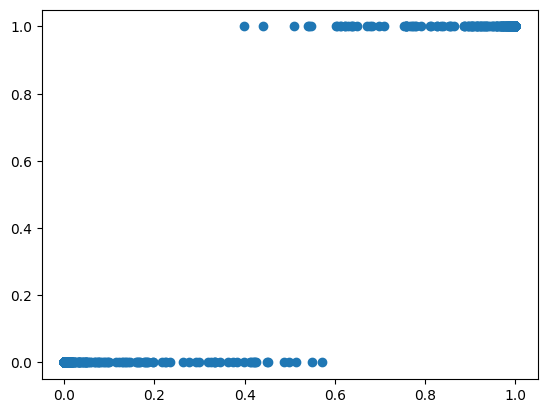

In [12]:
plt.figure()
plt.scatter(yhat,y)

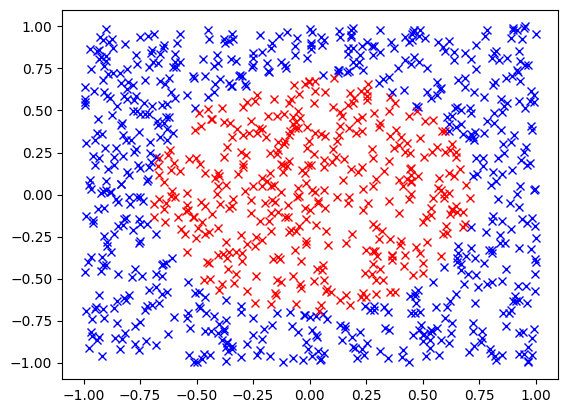

In [13]:
plotClass(X , yhat.T > 0.5 , 'x')



---



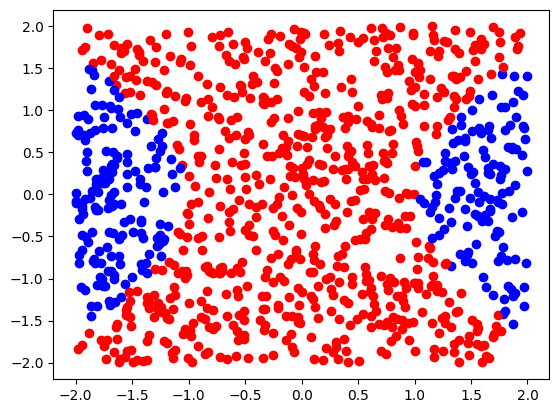

(2, 1000)
(1, 1000)
(1000, 2)
(1000, 1)


In [14]:
#Q2
num_data=1000 # data points per class

X=np.random.uniform(-2,2,[2,num_data])
y=X[0,:]**2-X[1,:]**2-1>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)
X = X.T # make data into rows then handle it
y = y.T
print(X.shape)
print(y.shape)

In [15]:

M = 4
A = []
for i in range(M + 1):
  for j in range(M + 1):
    A.append(X[:,0]**i * X[:, 1]**j)

A = np.array(A).T
print(A.shape)

(1000, 25)


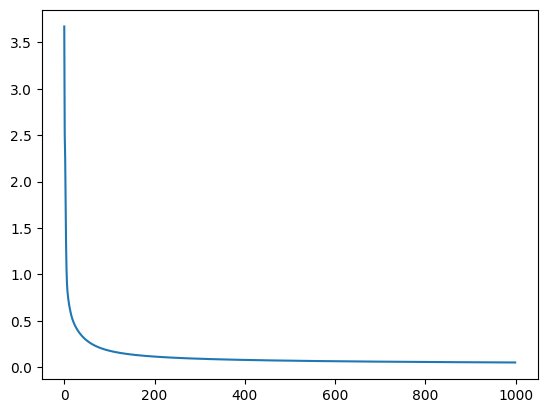

In [16]:
epochs = 1000
lr = 0.0001
ls = []
w = np.random.rand(A.shape[1], 1)
for i in range(epochs):
  #forward pass
  z = A @ w
  yhat = segmoid(z)
  loss = get_loss(yhat, y.reshape(-1,1))
  ls.append(loss)

  #backward
  dw = A.T @ (yhat - y.reshape(-1,1))
  w -= lr * dw

plt.plot(ls)

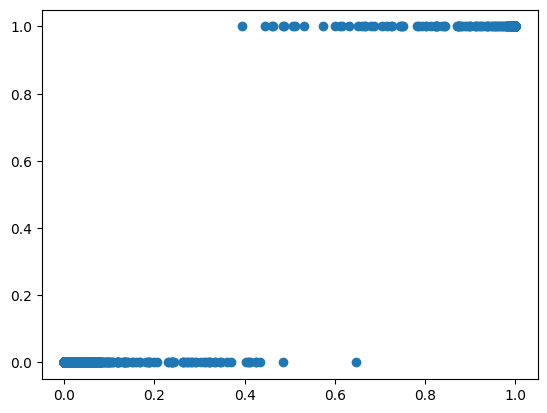

In [17]:
plt.figure()
plt.scatter(yhat,y)

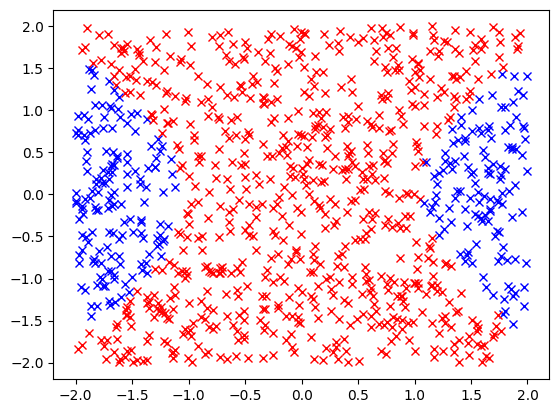

In [18]:
plotClass(X.T , yhat.T > 0.5 , 'x')



---



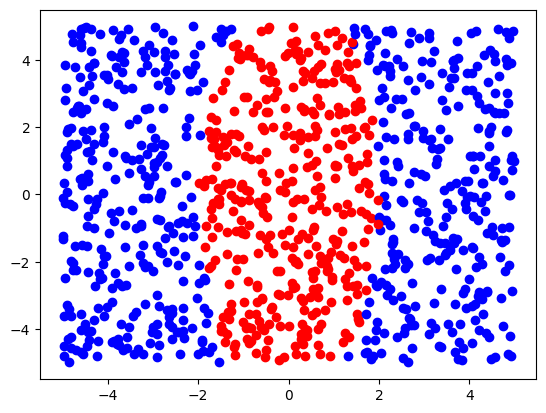

(1000, 2)
(1000, 1)


In [19]:
#Q3
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=5*X[0,:]**2+0.5*X[1,:]**2-20>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
X = X.T
y = y.T
print(X.shape)
print(y.shape)

In [20]:

M = 2
A = []
for i in range(M + 1):
  for j in range(M + 1):
    A.append(X[:,0]**i * X[:, 1]**j)

A = np.array(A).T
print(A.shape)

(1000, 9)


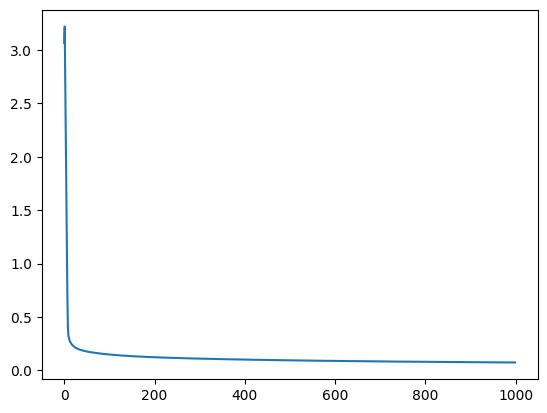

In [21]:
epochs = 1000
lr = 0.0001
ls = []
w = np.random.rand(A.shape[1], 1)
for i in range(epochs):
  #forward pass
  z = A @ w
  yhat = segmoid(z)
  loss = get_loss(yhat, y.reshape(-1,1))
  ls.append(loss)

  #backward
  dw = A.T @ (yhat - y.reshape(-1,1))
  w -= lr * dw

plt.plot(ls)

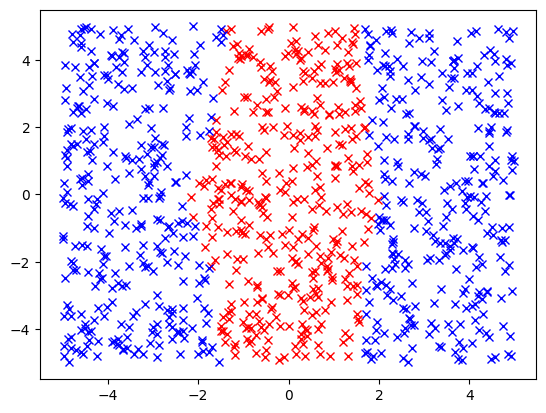

In [22]:
plotClass(X.T , yhat.T > 0.5 , 'x')

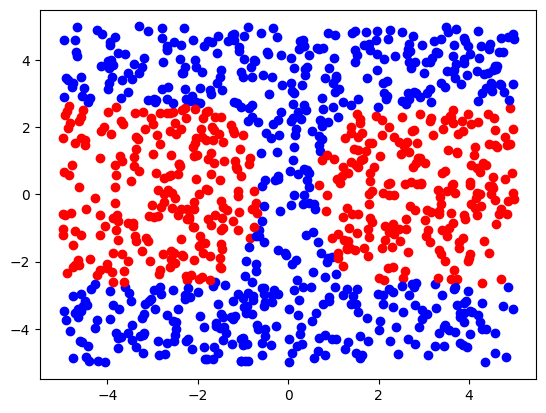

(1000, 2)
(1000, 1)


In [23]:
#Q4
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=10*np.exp(-X[0,:]**2)+X[1,:]**2-7>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
X = X.T
y=y.T
print(X.shape)
print(y.shape)

In [24]:

M = 2
A = []
for i in range(M + 1):
  for j in range(M + 1):
    A.append(X[:,0]**i * X[:, 1]**j)

A = np.array(A).T
print(A.shape)

(1000, 9)


In [ ]:
epochs = 10
lr = 0.001
ls = []
w = np.random.rand(A.shape[1], 1)
for i in range(epochs):
  #forward pass
  z = A @ w

  yhat = segmoid(z)
  loss = get_loss(yhat, y)
  print(yhat)
  ls.append(loss)

  #backward
  dw = A.T @ (yhat - y.reshape(-1,1))
  w -= lr * dw

In [26]:
print(ls)

[array([3.64291956]), array([7.08572553]), array([5.73163088]), array([5.19157411]), array([4.79679929]), array([4.18518219]), array([3.40856919]), array([1.10026155]), array([3.8185798]), array([4.58843672])]
